In [1]:
from google.colab import drive

drive.mount("/content/drive/")

Mounted at /content/drive/


In [2]:
cd /content/drive/MyDrive/Neurips23/Integrating-Spatial-Transform-Networks-with-PaDim-Architecture/

/content/drive/MyDrive/Neurips23/Integrating-Spatial-Transform-Networks-with-PaDim-Architecture


In [57]:
!tar -xvf ../mvtec_anomaly_detection.tar.xz -C data/

Streaming output truncated to the last 5000 lines.
grid/ground_truth/thread/010_mask.png
grid/ground_truth/bent/
grid/ground_truth/bent/000_mask.png
grid/ground_truth/bent/001_mask.png
grid/ground_truth/bent/002_mask.png
grid/ground_truth/bent/003_mask.png
grid/ground_truth/bent/004_mask.png
grid/ground_truth/bent/005_mask.png
grid/ground_truth/bent/006_mask.png
grid/ground_truth/bent/007_mask.png
grid/ground_truth/bent/008_mask.png
grid/ground_truth/bent/009_mask.png
grid/ground_truth/bent/010_mask.png
grid/ground_truth/bent/011_mask.png
grid/ground_truth/broken/
grid/ground_truth/broken/000_mask.png
grid/ground_truth/broken/001_mask.png
grid/ground_truth/broken/002_mask.png
grid/ground_truth/broken/003_mask.png
grid/ground_truth/broken/004_mask.png
grid/ground_truth/broken/005_mask.png
grid/ground_truth/broken/006_mask.png
grid/ground_truth/broken/007_mask.png
grid/ground_truth/broken/008_mask.png
grid/ground_truth/broken/009_mask.png
grid/ground_truth/broken/010_mask.png
grid/ground

    function ClickConnect(){
      console.log('Working');
      document.querySelector('colab-toolbar-button#toolbar-add-text').click();
    }
    intervalTiming = setInterval(ClickConnect, 600000);



    function ClickConnect() {
      console.log('Working')
      document
        .querySelector('#top-toolbar > colab-connect-button')
        .shadowRoot.querySelector('#connect')
        .click()
    }
    intervalTiming = setInterval(ClickConnect, 600000);


In [58]:
import sys
import os
import numpy as np
sys.path.insert(1, '../')


from src.padim_model import train as padim_train
from src.stn_model import train as stn_train
from src import utils


CLASS_NAMES = ['bottle', 'cable', 'capsule', 'carpet', 'grid',
               'hazelnut', 'leather', 'metal_nut', 'pill', 'screw',
               'tile', 'toothbrush', 'transistor', 'wood', 'zipper']

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [59]:
!ls

 apex
 data
'Enhancing Anomaly_Detection_with_Spatial_Transform_Networks (2).pdf'
 LICENSE
 materials
 notebooks
 README.md
 results
 src
 tsne_dark_efficientnet-b0.png
 tsne_dark_efficientnetv2_rw_m.png
 tsne_dark.png
 tsne_dark_resnet50.a1_in1k.png
 tsne_dark_resnext50_32x4d.png
 tsne_dark_tf_efficientnet_b5.png
 tsne_dark_vit_base_patch16_224.png
 tsne_train.png
 X_train_efficientnetv2_rw_m.npy
 X_train_resnet50.a1_in1k.npy
 X_train_resnext50_32x4d.npy
 X_train_tf_efficientnet_b5.npy
 X_train_tsne_resnet50.a1_in1k.npy
 X_train_tsne_resnext50_32x4d.npy
 X_train_tsne_tf_efficientnet_b5.npy
 X_train_tsne_vit_base_patch16_224.npy
 X_train_vit_base_patch16_224.npy
 y_train_resnet50.a1_in1k.npy
 y_train_resnext50_32x4d.npy
 y_train_tf_efficientnet_b5.npy
 y_train_vit_base_patch16_224.npy


In [4]:
utils.set_seed()

In [121]:
import torch
torch.cuda.is_available()

True

In [ ]:
stn_model,train_loader = stn_train.start(data_dir ='data',
                      batch_size = 128,
                      learning_rate = 0.0005,num_epochs = 20)

Using GPU optimization
Training ..
Epoch 1


/usr/local/lib/python3.10/dist-packages/torch/nn/functional.py:4358: UserWarning: Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torch/nn/functional.py:4296: UserWarning: Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.
  warnings.warn(


Train Epoch: 0 [0/3629 (0%)]	Loss: 0.646461
Train Epoch: 0 [2560/3629 (69%)]	Loss: 0.520690


100%|██████████| 6/6 [00:40<00:00,  6.73s/it]


Epoch 1/20, Training Loss: 0.7554714057756506
Epoch 1/20, Validation Loss: 0.36754028002421063
Epoch 2
Train Epoch: 1 [0/3629 (0%)]	Loss: 0.624318
Train Epoch: 1 [2560/3629 (69%)]	Loss: 0.580411


100%|██████████| 6/6 [00:39<00:00,  6.63s/it]


Epoch 2/20, Training Loss: 0.7153488151405168
Epoch 2/20, Validation Loss: 0.36898571252822876
Epoch 3
Train Epoch: 2 [0/3629 (0%)]	Loss: 0.483384
Train Epoch: 2 [2560/3629 (69%)]	Loss: 0.539948


100%|██████████| 6/6 [00:41<00:00,  6.90s/it]


Epoch 3/20, Training Loss: 0.6516880289368008
Epoch 3/20, Validation Loss: 0.3627067257960637
Epoch 4
Train Epoch: 3 [0/3629 (0%)]	Loss: 0.525176


In [141]:
11236/4

2809.0

In [142]:
stn_train.save_model(stn_model,model_name='results/stn_model_01_new.pt')

In [143]:
from src.stn_model.model import SpatialTransformerNetwork
import torch
from torch import Tensor, nn

stn_model = SpatialTransformerNetwork()
stn_model = nn.DataParallel(stn_model)
stn_model.to("cuda")


DataParallel(
  (module): SpatialTransformerNetwork(
    (localization): Sequential(
      (0): Conv2d(3, 8, kernel_size=(7, 7), stride=(1, 1))
      (1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (2): ReLU(inplace=True)
      (3): Conv2d(8, 10, kernel_size=(5, 5), stride=(1, 1))
      (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (5): ReLU(inplace=True)
    )
    (fc_loc): Sequential(
      (0): Linear(in_features=27040, out_features=32, bias=True)
      (1): ReLU(inplace=True)
      (2): Linear(in_features=32, out_features=6, bias=True)
    )
  )
)

In [144]:
stn_model_loaded = stn_train.load_model(stn_model,model_name='results/stn_model_01_new.pt')
stn_model_loaded.to("cuda")
stn_model_loaded.eval()

DataParallel(
  (module): SpatialTransformerNetwork(
    (localization): Sequential(
      (0): Conv2d(3, 8, kernel_size=(7, 7), stride=(1, 1))
      (1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (2): ReLU(inplace=True)
      (3): Conv2d(8, 10, kernel_size=(5, 5), stride=(1, 1))
      (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (5): ReLU(inplace=True)
    )
    (fc_loc): Sequential(
      (0): Linear(in_features=27040, out_features=32, bias=True)
      (1): ReLU(inplace=True)
      (2): Linear(in_features=32, out_features=6, bias=True)
    )
  )
)

In [145]:
!sudo apt install tree

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tree is already the newest version (2.0.2-1).
0 upgraded, 0 newly installed, 0 to remove and 15 not upgraded.


In [146]:
"""! tree -L 3 data/

data/
├── bottle
│   ├── ground_truth
│   │   ├── broken_large
│   │   ├── broken_small
│   │   └── contamination
│   ├── license.txt
│   ├── readme.txt
│   ├── test
│   │   ├── broken_large
│   │   ├── broken_small
│   │   ├── contamination
│   │   └── good
│   └── train
│       └── good

"""

'! tree -L 3 data/\n\ndata/\n├── bottle\n│   ├── ground_truth\n│   │   ├── broken_large\n│   │   ├── broken_small\n│   │   └── contamination\n│   ├── license.txt\n│   ├── readme.txt\n│   ├── test\n│   │   ├── broken_large\n│   │   ├── broken_small\n│   │   ├── contamination\n│   │   └── good\n│   └── train\n│       └── good\n\n'

In [147]:
!ls data/bottle/test/broken_large/

000.png  002.png  004.png  006.png  008.png  010.png  012.png  014.png	016.png  018.png
001.png  003.png  005.png  007.png  009.png  011.png  013.png  015.png	017.png  019.png


In [149]:
#stn_model_loaded.module.stn

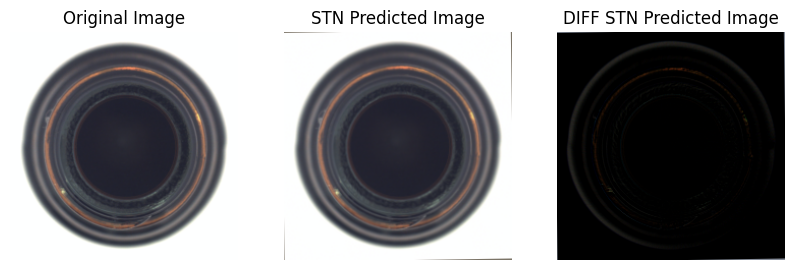

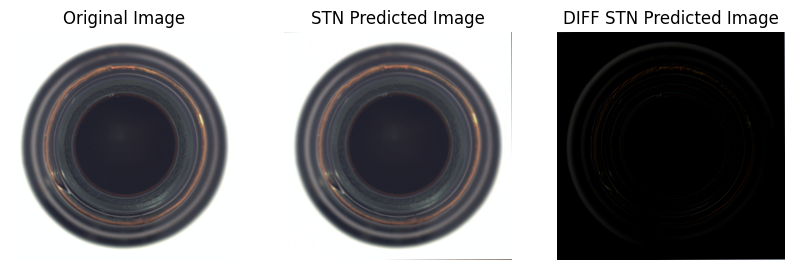

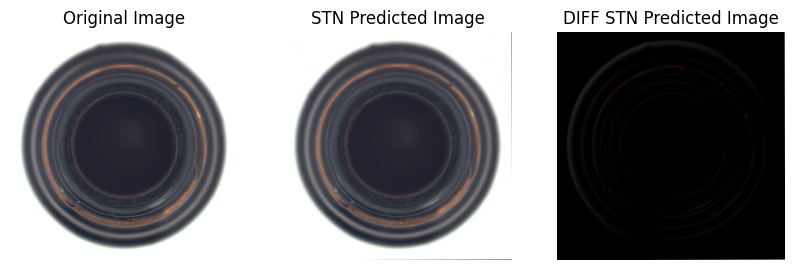

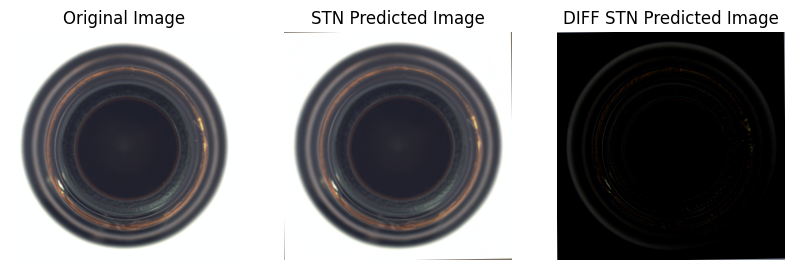

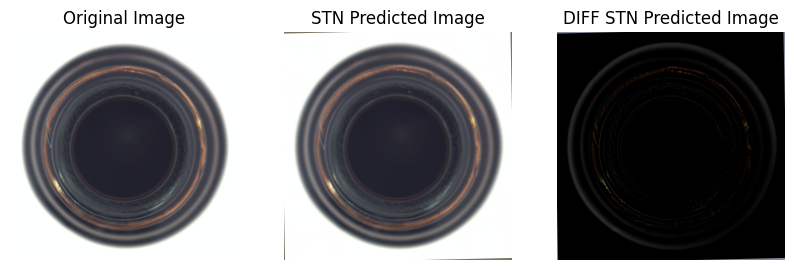

In [152]:
import torch
import numpy as np
from torchvision import transforms
import os
from PIL import Image
import torch
from torch.utils.data import Dataset, DataLoader



train_transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize and crop the image to 224x224
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                  std=[0.229, 0.224, 0.225])

])

import glob

img_paths = glob.glob("data/bottle/train/good/*.png")
#img_paths = glob.glob("data/bottle/test/broken_large/*.png")

for img_path_1 in img_paths[:5]:
  image_1 = Image.open(img_path_1).convert("RGB")

  image_1 = train_transform(image_1)
  imgs = [image_1]
  inputs = torch.stack(imgs).cuda()
  with torch.no_grad():
    stn_predicted = stn_model_loaded(inputs)

  # Convert tensors to numpy arrays for visualization
  orig_image = inputs[0].cpu().numpy().transpose((1, 2, 0))
  stn_predicted_image = stn_predicted[0].cpu().numpy().transpose((1, 2, 0))

  import matplotlib.pyplot as plt

  # Undo normalization to display images correctly
  orig_image = (orig_image * [0.229, 0.224, 0.225]) + [0.485, 0.456, 0.406]
  #orig_image = np.clip(orig_image, 0, 1)

  stn_predicted_image = (stn_predicted_image * [0.229, 0.224, 0.225]) + [0.485, 0.456, 0.406]
  #stn_predicted_image = np.clip(stn_predicted_image, 0, 1)

  # Plot the images side by side
  fig, axes = plt.subplots(1, 3, figsize=(10, 5))
  axes[0].imshow(orig_image)
  axes[0].set_title('Original Image')
  axes[0].axis('off')

  axes[1].imshow(stn_predicted_image)
  axes[1].set_title('STN Predicted Image')
  axes[1].axis('off')

  axes[2].imshow(orig_image-stn_predicted_image)
  axes[2].set_title('DIFF STN Predicted Image')
  axes[2].axis('off')

In [ ]:
stn_predicted.shape

In [ ]:
plt.imshow(stn_predicted_image-orig_image)
plt.show()

In [ ]:
np.sum(stn_predicted_image-orig_image)*255

In [78]:
np.std(stn_predicted_image-orig_image)

1.2246370421306836e-06

In [153]:
!ls

 apex
 data
'Enhancing Anomaly_Detection_with_Spatial_Transform_Networks (2).pdf'
 LICENSE
 materials
 notebooks
 README.md
 results
 src
 tsne_dark_efficientnet-b0.png
 tsne_dark_efficientnetv2_rw_m.png
 tsne_dark.png
 tsne_dark_resnet50.a1_in1k.png
 tsne_dark_resnext50_32x4d.png
 tsne_dark_tf_efficientnet_b5.png
 tsne_dark_vit_base_patch16_224.png
 tsne_train.png
 X_train_efficientnetv2_rw_m.npy
 X_train_resnet50.a1_in1k.npy
 X_train_resnext50_32x4d.npy
 X_train_tf_efficientnet_b5.npy
 X_train_tsne_resnet50.a1_in1k.npy
 X_train_tsne_resnext50_32x4d.npy
 X_train_tsne_tf_efficientnet_b5.npy
 X_train_tsne_vit_base_patch16_224.npy
 X_train_vit_base_patch16_224.npy
 y_train_resnet50.a1_in1k.npy
 y_train_resnext50_32x4d.npy
 y_train_tf_efficientnet_b5.npy
 y_train_vit_base_patch16_224.npy


    cd ano-synth
    !git config --global user.email "mecatronico.lazo@gmail.com"
    !git config --global user.name "CristianLazoQuispe"
    #!git push https://<GITHUB_ACCESS_TOKEN>@github.com/<GITHUB_USERNAME>/<REPOSITORY_NAME>.git
    #
    #!git push https://GITHUB_ACCESS_TOKEN@github.com/CristianLazoQuispe/ano-synth.git

In [159]:
!mv *.png ../datos_procesados/

In [163]:
!sudo apt-get install nano

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
Suggested packages:
  hunspell
The following NEW packages will be installed:
  nano
0 upgraded, 1 newly installed, 0 to remove and 15 not upgraded.
Need to get 280 kB of archives.
After this operation, 881 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/main amd64 nano amd64 6.2-1 [280 kB]
Fetched 280 kB in 1s (316 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package nano.
(Reading database ... 120907 files and directo